In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_FULL_ESTIMATES.csv', sep=',',skiprows=16, header=0)

C:\Users\qadee\AppData\Local\Temp\ipykernel_2804\2401214116.py:1: DtypeWarning: Columns (3,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_FULL_ESTIMATES.csv', sep=',',skiprows=16, header=0)


In [4]:
print(data.values)

[[1 'Estimates' 'World' ... '   323' '0' '0']
 [2 'Estimates' 'World' ... '   316' '0' '0']
 [3 'Estimates' 'World' ... '   307' '0' '0']
 ...
 [21981 'Estimates' 'Wallis and Futuna Islands' ... 83 '-   0' -6.1]
 [21982 'Estimates' 'Wallis and Futuna Islands' ... 72 '-   0' -11.0]
 [21983 'Estimates' 'Wallis and Futuna Islands' ... 71 '-   0' -9.4]]


In [5]:
print(data.columns)

Index(['Index', 'Variant', 'Region, subregion, country or area *', 'Notes',
       'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**',
       'Type', 'Parent code', 'Year',
       'Total Population, as of 1 January (thousands)',
       'Total Population, as of 1 July (thousands)',
       'Male Population, as of 1 July (thousands)',
       'Female Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Natural Change, Births minus Deaths (thousands)',
       'Rate of Natural Change (per 1,000 population)',
       'Population Change (thousands)', 'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)', 'Births (thousands)',
       'Births by women aged 15 to 19 (thousands)',
       'Crude Birth Rate (births per 1,000 population)',
       'Total Fertility Rate (live births

In [19]:
data['Births (thousands)'] = pd.to_numeric(data['Births (thousands)'], errors='coerce')
data['Total Deaths (thousands)'] = pd.to_numeric(data['Total Deaths (thousands)'], errors='coerce')
data.dropna(subset=['Births (thousands)', 'Total Deaths (thousands)'], inplace=True)

In [16]:
X = data['Births (thousands)'].values.reshape(-1, 1)
y = data['Total Deaths (thousands)'].values.reshape(-1, 1)

In [17]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

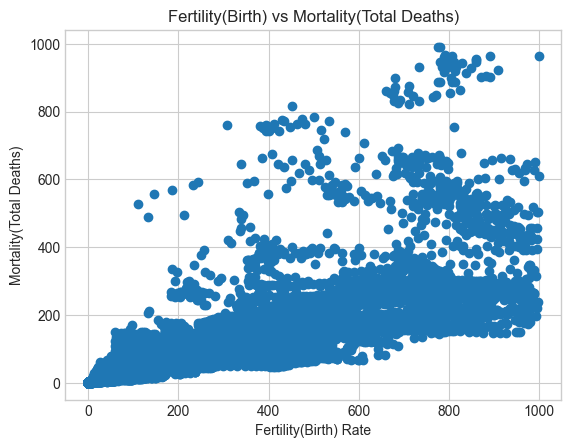

In [18]:
plt.scatter(data['Births (thousands)'], data['Total Deaths (thousands)'])

plt.title('Fertility(Birth) vs Mortality(Total Deaths)')
plt.xlabel('Fertility(Birth) Rate')
plt.ylabel('Mortality(Total Deaths)')
plt.grid(True)
plt.show()